## Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")

#### Errorbar

<ErrorbarContainer object of 3 artists>

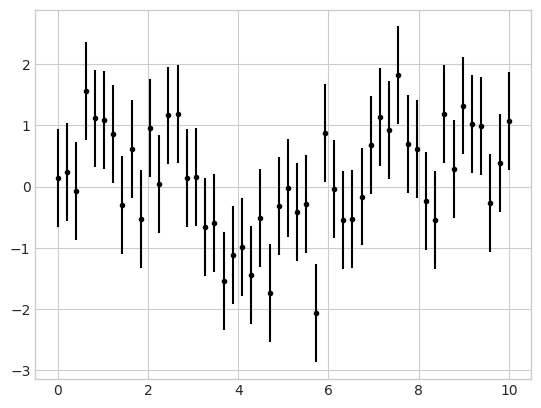

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt=".k")

<ErrorbarContainer object of 3 artists>

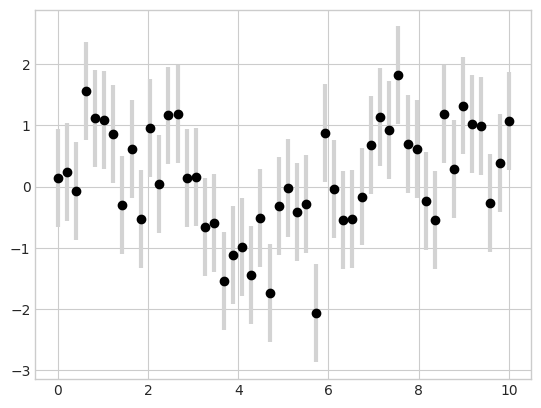

In [4]:
plt.errorbar(x, y, yerr=dy, fmt="o", color="black",
             ecolor="lightgray", elinewidth=3, capsize=0)

In [5]:
# old version of GaussianProcess has been deprecated
# reference: https://stackoverflow.com/questions/41535569/scikit-learn-gaussianprocessregressor-vs-gaussianprocess-why-was-gaussianproces
from sklearn.gaussian_process import GaussianProcessRegressor

In [6]:
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

In [7]:
# reference: https://stackoverflow.com/questions/53197979/translating-scikit-learn-version-0-17-code-to-verion-0-20
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(xdata[:,np.newaxis],ydata)
xfit = np.linspace(0,10,1000)
yfit, sigma = gp.predict(xfit[:,np.newaxis], return_std=True)
dyfit = 2*sigma

(0.0, 10.0)

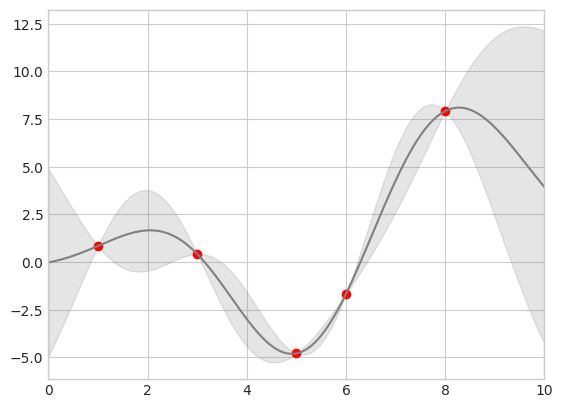

In [8]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)